MACHINE LEARNING REGRESSION 

Dilara Ozdil

In [1]:
import os

# Set the working directory
os.chdir(r'C:\Users\ozdil\Downloads\_assessment_project-20250428T110239Z-001\_assessment_project\data')

# Confirm it worked
print(os.getcwd())


C:\Users\ozdil\Downloads\_assessment_project-20250428T110239Z-001\_assessment_project\data


In [2]:
# import all the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns


1. EXPLORATORY DATA ANALYSIS

 
> Dataset Characteristics
> 
> Size: 156,454 observations with 34 features
> 
> 
> 
> Data Types:
> 
> 
> 
> 22 numerical features (e.g., dim_m2, n_rooms, price_z)
> 
> 
> 
> 12 categorical features (e.g., obj_type, build_mat, has_lift)
> 
> 
> 
> Missing Values: Significant missing data in several columns:
> 
> 
> 
> cond_class (74.82% missing)
> 
> 
> 
> build_mat (39.63% missing)
> 
> 
> 
> floor_no (17.7% missing)
> 
> 
> 
> Key Findings
> 
> The target variable price_z showed right-skewness, requiring log transformation for normalization
> 
> 
> 
> Distance-related features (dist_centre, dist_sch, etc.) exhibited interesting spatial patterns
> 
> 
> 
> The dataset contains both modern and historical properties (year built ranging from 1850 to 2024)

In [3]:
# lets import data
df = pd.read_csv('appartments_train.csv')

df.head() # Shows the first five rows of the dataset

,unit_id,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,...,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
0,a3a463617a5c0439,0d6c4dfc,45.89,2.0,1.0,4.0,1999.0,13.496,11.0,0.541,...,519626.21,2023-09,693f303c,501710.76,14.02,95.39,44.51,0.999,13.99,100.291946
1,23a92531fcb238b4,0c238f18,27.64,1.0,1.0,2.0,1940.0,2.440,16.0,0.377,...,162959.26,2024-04,8d5a4f0c,147763.87,110.55,46.17,56.25,1.000,7.59,91.315644
2,d158671401f9fc34,0d6c4dfc,62.18,2.0,1.0,2.0,2000.0,10.284,8.0,0.391,...,1167571.51,2023-10,693f303c,1042847.59,31.15,18.94,50.36,0.999,21.14,93.681619
3,280aced4655b7a96,2a6d5c01,53.68,2.0,NaN,4.0,2018.0,10.589,30.0,0.729,...,907071.16,2024-01,693f303c,728839.39,7.52,11.84,46.69,0.999,7.91,94.192062
4,2315fa621e746fe4,2a6d5c01,70.89,3.0,2.0,3.0,2015.0,8.305,7.0,1.226,...,1080383.19,2023-11,693f303c,1263171.15,11.20,89.64,45.60,0.999,8.63,96.166051


In [4]:

print(df.info())  # Summary: types, non-null counts
print(df.describe())  # Stats summary for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156454 entries, 0 to 156453
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unit_id                     156454 non-null  object 
 1   obj_type                    122634 non-null  object 
 2   dim_m2                      156454 non-null  float64
 3   n_rooms                     156454 non-null  float64
 4   floor_no                    128756 non-null  float64
 5   floor_max                   154533 non-null  float64
 6   year_built                  130741 non-null  float64
 7   dist_centre                 156454 non-null  float64
 8   n_poi                       156454 non-null  float64
 9   dist_sch                    156324 non-null  float64
 10  dist_clinic                 155883 non-null  float64
 11  dist_post                   156266 non-null  float64
 12  dist_kind                   156291 non-null  float64
 13  dist_rest     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156454 entries, 0 to 156453
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unit_id                     156454 non-null  object 
 1   obj_type                    122634 non-null  object 
 2   dim_m2                      156454 non-null  float64
 3   n_rooms                     156454 non-null  float64
 4   floor_no                    128756 non-null  float64
 5   floor_max                   154533 non-null  float64
 6   year_built                  130741 non-null  float64
 7   dist_centre                 156454 non-null  float64
 8   n_poi                       156454 non-null  float64
 9   dist_sch                    156324 non-null  float64
 10  dist_clinic                 155883 non-null  float64
 11  dist_post                   156266 non-null  float64
 12  dist_kind                   156291 non-null  float64
 13  dist_rest     

In [6]:
columns_with_missings = df.columns[df.isnull().any()]
df[columns_with_missings].isnull().sum()

obj_type                   33820
floor_no                   27698
floor_max                   1921
year_built                 25713
dist_sch                     130
dist_clinic                  571
dist_post                    188
dist_kind                    163
dist_rest                    391
dist_uni                    4317
dist_pharma                  219
build_mat                  61999
cond_class                117058
has_lift                    7727
infrastructure_quality     25713
dtype: int64

In [7]:
# Percentage of missing values per column
print((df.isnull().mean() * 100).round(2))


unit_id                        0.00
obj_type                      21.62
dim_m2                         0.00
n_rooms                        0.00
floor_no                      17.70
floor_max                      1.23
year_built                    16.43
dist_centre                    0.00
n_poi                          0.00
dist_sch                       0.08
dist_clinic                    0.36
dist_post                      0.12
dist_kind                      0.10
dist_rest                      0.25
dist_uni                       2.76
dist_pharma                    0.14
own_type                       0.00
build_mat                     39.63
cond_class                    74.82
has_park                       0.00
has_balcony                    0.00
has_lift                       4.94
has_sec                        0.00
has_store                      0.00
price_z                        0.00
src_month                      0.00
loc_code                       0.00
market_volatility           

In [8]:
# frequency tables for these columns
print("\nFrequency counts for floor_no: \n")
print(df['floor_no'].value_counts(dropna = False))

print("\nFrequency counts for floor_max : \n")
print(df['floor_max'].value_counts(dropna = False))

print("\nFrequency counts for year_built : \n")
print(df['year_built'].value_counts(dropna = False))

print("\nFrequency counts for dist_sch  : \n")
print(df['dist_sch'].value_counts(dropna = False))

print("\nFrequency counts for dist_clinic : \n")
print(df['dist_clinic'].value_counts(dropna = False))

print("\nFrequency counts for dist_kind  : \n")
print(df['dist_kind'].value_counts(dropna = False))

print("\nFrequency counts for dist_rest : \n")
print(df['dist_rest'].value_counts(dropna = False))

print("\nFrequency counts for dist_pharma : \n")
print(df['dist_pharma'].value_counts(dropna = False))



Frequency counts for floor_no: 

floor_no
1.0     30396
NaN     27698
3.0     27034
2.0     26939
4.0     19173
5.0      7361
6.0      4481
7.0      3521
8.0      2710
9.0      2336
10.0     2224
11.0      902
12.0      508
14.0      334
13.0      258
15.0      206
17.0      155
16.0       92
20.0       25
18.0       25
24.0       19
29.0       14
23.0       14
22.0       11
25.0        6
21.0        6
19.0        5
27.0        1
Name: count, dtype: int64

Frequency counts for floor_max : 

floor_max
4.0     48935
3.0     28889
5.0     15378
10.0    14002
2.0     12042
6.0      8590
7.0      5662
8.0      4533
11.0     4199
1.0      3556
9.0      2049
NaN      1921
12.0     1712
15.0     1176
17.0      930
16.0      790
13.0      691
14.0      548
18.0      191
23.0      111
19.0      106
24.0       97
22.0       84
20.0       61
25.0       58
27.0       53
29.0       35
26.0       24
28.0       18
21.0       13
Name: count, dtype: int64

Frequency counts for year_built : 

year_built

In [9]:
# Fill Numerical with Median
num_cols_to_fill = ['floor_no', 'floor_max', 'year_built', 
                    'dist_sch', 'dist_clinic', 'dist_post', 
                    'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma','infrastructure_quality']
for col in num_cols_to_fill:
    df[col] = df[col].fillna(df[col].median())

print(df[num_cols_to_fill].isnull().sum())


floor_no                  0
floor_max                 0
year_built                0
dist_sch                  0
dist_clinic               0
dist_post                 0
dist_kind                 0
dist_rest                 0
dist_uni                  0
dist_pharma               0
infrastructure_quality    0
dtype: int64


In [10]:
df = df.drop('cond_class', axis=1)

In [11]:
#NOMINAL VAR
print("\nFrequency counts for obj_type: \n")
print(df['obj_type'].value_counts(dropna = False))

print("\nFrequency counts for build_mat: \n")
print(df['build_mat'].value_counts(dropna = False))

print("\nFrequency counts for has_lift: \n")
print(df['has_lift'].value_counts(dropna = False))


Frequency counts for obj_type: 

obj_type
0d6c4dfc    73136
NaN         33820
2a6d5c01    26001
0c238f18    23497
Name: count, dtype: int64

Frequency counts for build_mat: 

build_mat
7ceffe3b    73414
NaN         61999
7f8c00f9    21041
Name: count, dtype: int64

Frequency counts for has_lift: 

has_lift
no     74680
yes    74047
NaN     7727
Name: count, dtype: int64


In [12]:
nominal_variables = ['obj_type','build_mat','has_lift']


df['obj_type'] = df['obj_type'].fillna('None')
df['build_mat'] = df['build_mat'].fillna('None')
df['has_lift'] = df['has_lift'].fillna('None')


print(df[nominal_variables].isnull().sum())


obj_type     0
build_mat    0
has_lift     0
dtype: int64


Feature Engineering

> Handling Missing Data
> 
> Numerical variables: Imputed with median values
> 
> 
> 
> Categorical variables:
> 
> 
> 
> Missing values treated as a separate category ("None")
> 
> 
> 
> High-missing columns like cond_class were dropped
> 
> 
> 
> Transformations
> 
> Log transformation applied to right-skewed numerical variables
> 
> 
> 
> Standard scaling for normally distributed features
> 
> 
> 
> Yeo-Johnson transformation for features with negative values
> 
> 
> 
> New Features Created
> 
> Age of property: Calculated from year_built
> 
> 
> 
> Central location indicator: Based on distance percentiles
> 
> 
> 
> Market condition score: Combining volatility and economic indices
> 
> 
> 
> Floor ratio: Relative floor position in building
> 
> 
> 
> Room density: Rooms per square meter
> 
> 
> 
> POI accessibility score: Composite of inverse distances to points of interest

In [13]:
import pandas as pd

# Convert to datetime if not already
df['src_month'] = pd.to_datetime(df['src_month'])

# Extract year and compute age
df['age'] = df['src_month'].dt.year - df['year_built']
df['age'] = df['age'].clip(lower=0)  # Optional: remove negative ages if data is dirty

# Drop the original 'year_built' column
df = df.drop(columns=['year_built'])


C:\Users\ozdil\AppData\Local\Temp\ipykernel_5640\3237826854.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['src_month'] = pd.to_datetime(df['src_month'])


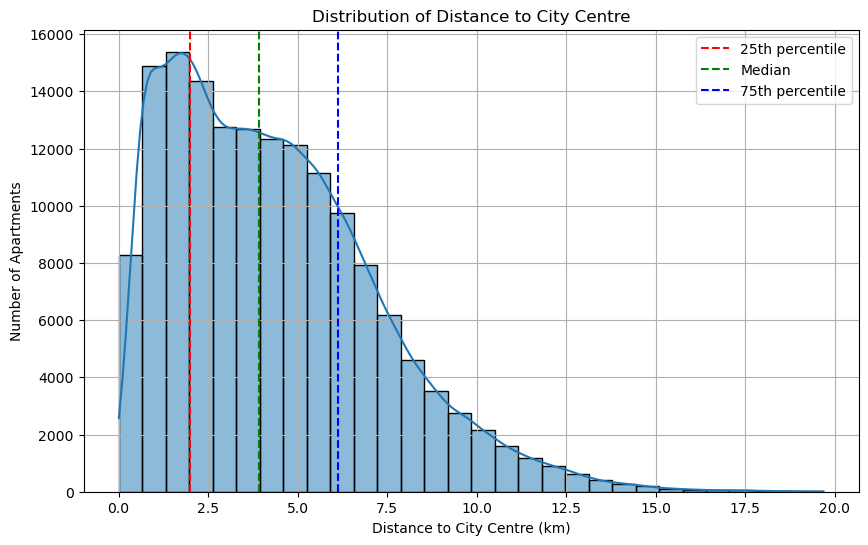

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['dist_centre'], bins=30, kde=True)
plt.title('Distribution of Distance to City Centre')
plt.xlabel('Distance to City Centre (km)')
plt.ylabel('Number of Apartments')
plt.axvline(df['dist_centre'].quantile(0.25), color='red', linestyle='--', label='25th percentile')
plt.axvline(df['dist_centre'].quantile(0.50), color='green', linestyle='--', label='Median')
plt.axvline(df['dist_centre'].quantile(0.75), color='blue', linestyle='--', label='75th percentile')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
q25 = df['dist_centre'].quantile(0.25)
q50 = df['dist_centre'].quantile(0.50)
q75 = df['dist_centre'].quantile(0.75)

print(f"25th percentile (Q1): {q25:.2f} km")
print(f"Median (Q2): {q50:.2f} km")
print(f"75th percentile (Q3): {q75:.2f} km")


25th percentile (Q1): 2.00 km
Median (Q2): 3.94 km
75th percentile (Q3): 6.13 km


In [16]:
# Example: use 25th percentile as threshold
central_threshold = df['dist_centre'].quantile(0.25)
df['is_central'] = (df['dist_centre'] < central_threshold).astype(int)


In [17]:
df['market_condition_score'] = df['market_volatility'] * df['global_economic_index']
df = df.drop(columns=['market_volatility'])


In [18]:
df['floor_ratio'] = df['floor_no'] / df['floor_max']
df['floor_ratio'] = df['floor_ratio'].clip(upper=1)  # Avoid >1 from data errors


In [19]:
df['rooms_per_m2'] = df['n_rooms'] / df['dim_m2']
df = df.drop(columns=['dim_m2','n_rooms'])

In [20]:
poi_dists = ['dist_sch', 'dist_clinic', 'dist_post', 'dist_kind', 
             'dist_rest', 'dist_uni', 'dist_pharma']

# Compute inverse distances
inverse_poi_dists = df[poi_dists].apply(lambda x: 1 / (x + 1), axis=1)

# Sum them row-wise
df['poi_accessibility_score'] = inverse_poi_dists.sum(axis=1)


In [21]:
df = df.drop_duplicates()


In [22]:
from sklearn.model_selection import train_test_split

target = 'price_z'

# Proper split: 15% for test
X_temp, X_test, y_temp, y_test = train_test_split(
    df.drop(columns=[target]),
    df[target],
    test_size=0.15,
    random_state=42
)

# Double-check that the shapes match now:
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# Then split the remaining into train/val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.15 / 0.85,  # Keep 15% of the remaining as validation
    random_state=42
)


X_test.shape: (23469, 34)
y_test.shape: (23469,)


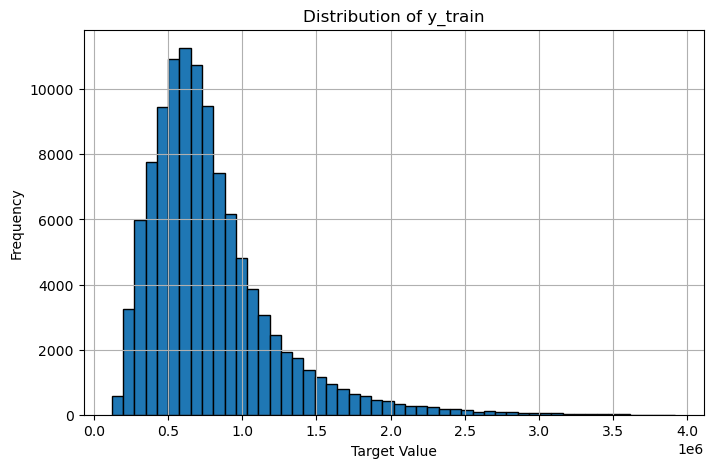

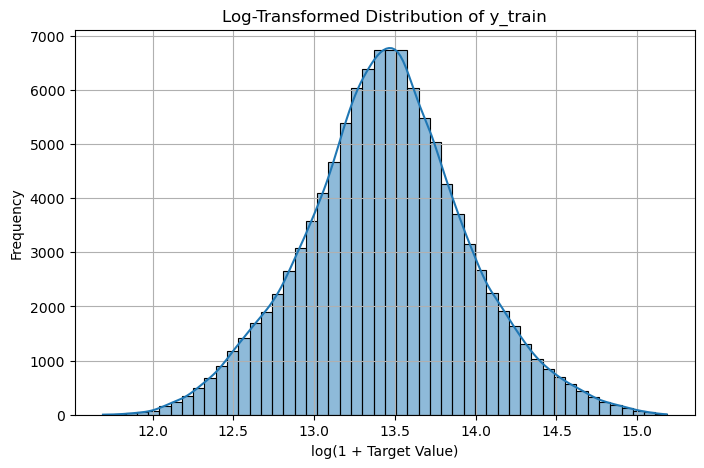

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=50, edgecolor='black')
plt.title('Distribution of y_train')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation
y_train_log = np.log1p(y_train)

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(y_train_log, kde=True, bins=50)
plt.title('Log-Transformed Distribution of y_train')
plt.xlabel('log(1 + Target Value)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [24]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Ensure Series format
y_train = pd.Series(y_train)
y_val = pd.Series(y_val)
y_test= pd.Series(y_val)
# Log transform
log_y_train = np.log1p(y_train)
log_y_val = np.log1p(y_val)

# Compute z-scores
z_y_train = zscore(y_train)
z_y_val = zscore(y_val)
z_log_y_train = zscore(log_y_train)
z_log_y_val = zscore(log_y_val)



# Print summary
print("y_train: original =", len(y_train))
print("y_val:   original =", len(y_val))
print("log_y_train: original =", len(log_y_train))
print("log_y_val:   original =", len(log_y_val))
print("y_test:   original =", len(y_test))


y_train: original = 109517
y_val:   original = 23468
log_y_train: original = 109517
log_y_val:   original = 23468
y_test:   original = 23468


In [25]:

# Select numeric columns from your original training data
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
print(numeric_cols)

Index(['floor_no', 'floor_max', 'dist_centre', 'n_poi', 'dist_sch',
       'dist_clinic', 'dist_post', 'dist_kind', 'dist_rest', 'dist_uni',
       'dist_pharma', 'infrastructure_quality', 'neighborhood_crime_rate',
       'popularity_index', 'green_space_ratio', 'estimated_maintenance_cost',
       'global_economic_index', 'age', 'market_condition_score', 'floor_ratio',
       'rooms_per_m2', 'poi_accessibility_score'],
      dtype='object')


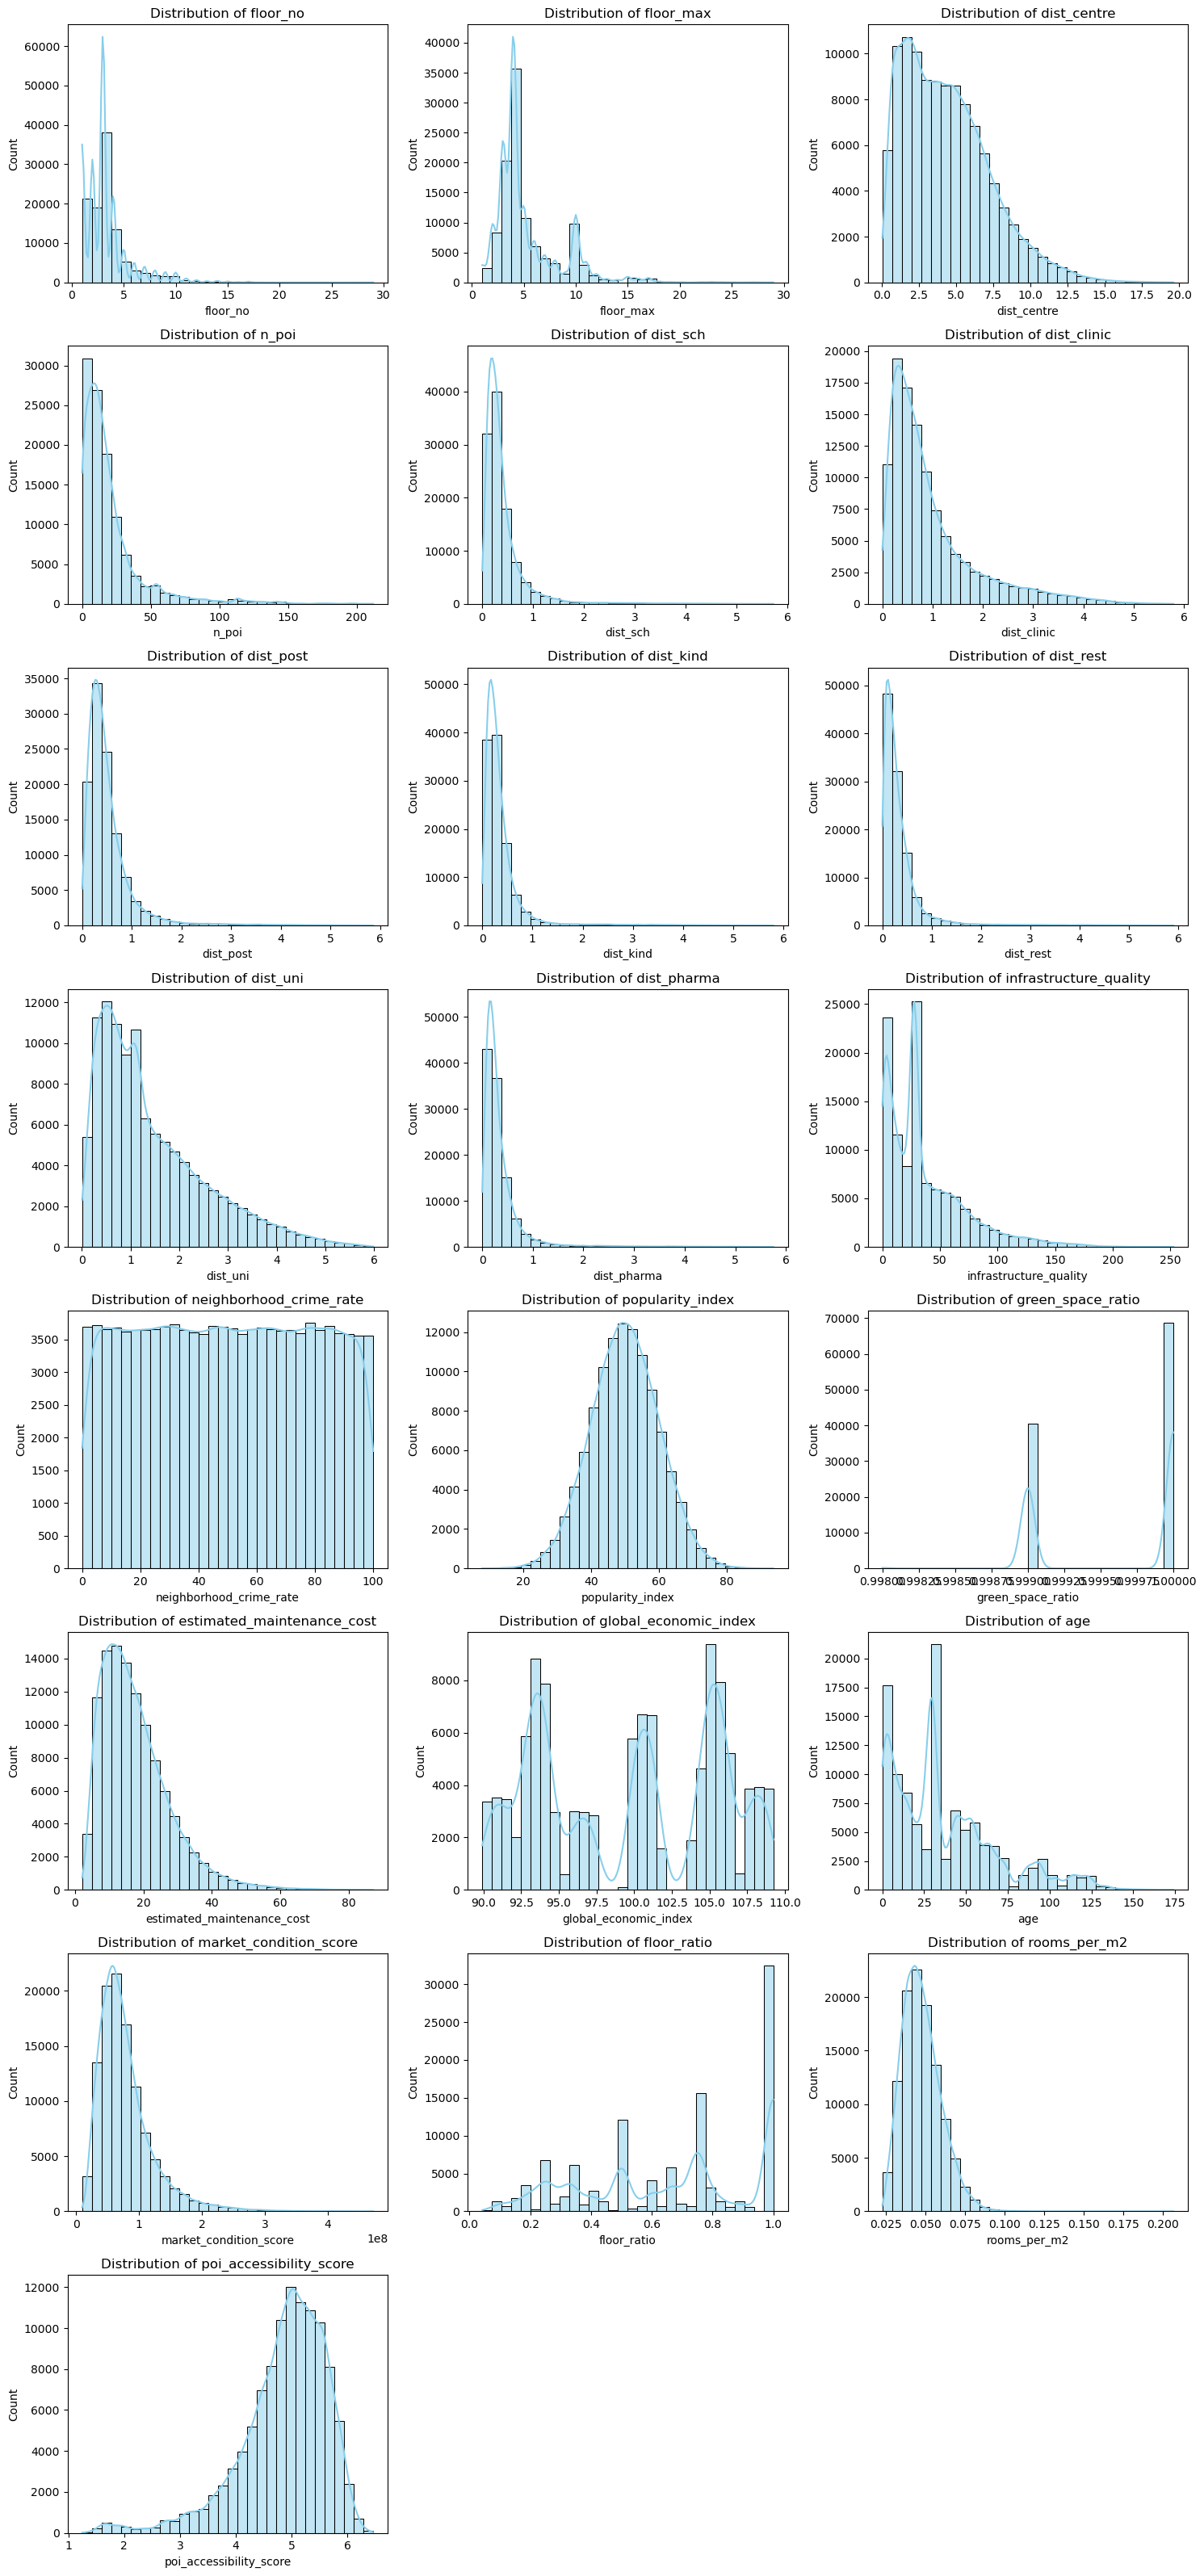

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns from your original training data
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

# Set up the plot grid
num_cols = len(numeric_cols)
ncols = 3
nrows = (num_cols + ncols - 1) // ncols  # Ceiling division

plt.figure(figsize=(ncols * 5, nrows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.histplot(X_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [27]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)


['floor_no', 'floor_max', 'dist_centre', 'n_poi', 'dist_sch', 'dist_clinic', 'dist_post', 'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma', 'price_z', 'infrastructure_quality', 'neighborhood_crime_rate', 'popularity_index', 'green_space_ratio', 'estimated_maintenance_cost', 'global_economic_index', 'age', 'is_central', 'market_condition_score', 'floor_ratio', 'rooms_per_m2', 'poi_accessibility_score']


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Define your numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()



# Exclude 'price_z' if it's in the list
if 'price_z' in numeric_cols:
    numeric_cols.remove('price_z')

# Subset the DataFrame
X_train_numeric = X_train[numeric_cols].copy()

# Ensure no NaNs or non-finite values
X_train_numeric = X_train_numeric.replace([np.inf, -np.inf], np.nan)
X_train_numeric = X_train_numeric.fillna(0)

# Add constant
X_train_const = sm.add_constant(X_train_numeric)

# Calculate VIF
vif_df = pd.DataFrame()
vif_df["feature"] = X_train_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_const.values, i)
                 for i in range(X_train_const.shape[1])]

print(vif_df)


c:\Users\ozdil\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                       feature       VIF
0                        const  0.000000
1                     floor_no  5.898673
2                    floor_max  5.351026
3                  dist_centre  4.691686
4                        n_poi  2.123091
5                     dist_sch  3.635490
6                  dist_clinic  2.358939
7                    dist_post  3.509627
8                    dist_kind  3.849186
9                    dist_rest  3.943337
10                    dist_uni  2.203686
11                 dist_pharma  5.105989
12      infrastructure_quality  6.419142
13     neighborhood_crime_rate  1.000161
14            popularity_index  1.000243
15           green_space_ratio  3.381407
16  estimated_maintenance_cost  1.263235
17       global_economic_index  1.016690
18                         age  6.756146
19                  is_central  2.108091
20      market_condition_score  1.341766
21                 floor_ratio  3.872141
22                rooms_per_m2  1.098869
23     poi_acces

In [29]:
def clip_at_percentile(df, cols, percentile=0.99):
    for col in cols:
        upper_limit = df[col].quantile(percentile)
        df[col] = np.clip(df[col], a_min=None, a_max=upper_limit)
    return df

# Columns that may need clipping (you can refine this list)
clip_cols = ['n_poi', 'estimated_maintenance_cost', 'market_condition_score', 'age']

X_train_clipped = clip_at_percentile(X_train.copy(), clip_cols)
X_val_clipped = clip_at_percentile(X_val.copy(), clip_cols)

# Then run your transformation pipeline on X_train_clipped and X_val_clipped


In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer


# Define skewness thresholds
right_skew_threshold = 0.5
left_skew_threshold = -0.5

log_transform_cols = []
yeo_johnson_cols = []
standard_scale_cols = []


numeric_cols = ['floor_no', 'floor_max', 'dist_centre', 'n_poi', 'dist_sch',
       'dist_clinic', 'dist_post', 'dist_kind', 'dist_rest', 'dist_uni',
       'dist_pharma', 'infrastructure_quality', 'neighborhood_crime_rate',
       'popularity_index', 'green_space_ratio', 'estimated_maintenance_cost',
       'global_economic_index', 'age', 'market_condition_score', 'floor_ratio',
       'rooms_per_m2', 'poi_accessibility_score']

for col in numeric_cols:
    skewness = X_train[col].skew()
    # Decide which transform to apply based on skewness
    if skewness > right_skew_threshold:
        # Right skew: use log transform if all values are positive
        if (X_train[col] > 0).all():
            log_transform_cols.append(col)
        else:
            yeo_johnson_cols.append(col)
    elif skewness < left_skew_threshold:
        # Left skew: use Yeo-Johnson (can handle negative and zero)
        yeo_johnson_cols.append(col)
    else:
        # Approximately symmetric - just scale
        standard_scale_cols.append(col)


# Initialize the scalers
scaler = StandardScaler()
pt = PowerTransformer(method='yeo-johnson')

# Create copies to avoid modifying the original data
X_train_transformed = X_train.copy()
X_val_transformed = X_val.copy()

# Step 2: Apply Transformations
# Filter columns to only those that exist in your DataFrame
log_transform_cols = [col for col in log_transform_cols if col in X_train_transformed.columns]

# Then loop over filtered columns to apply the log transform
for col in log_transform_cols:
    X_train_transformed[col] = np.log1p(X_train_transformed[col])
    X_val_transformed[col] = np.log1p(X_val_transformed[col])


# Apply Yeo-Johnson Transformation (for mixed skewed variables)
for col in yeo_johnson_cols:
    X_train_transformed[col] = pt.fit_transform(X_train_transformed[[col]])
    X_val_transformed[col] = pt.transform(X_val_transformed[[col]])

# Apply Standard Scaling
X_train_transformed[standard_scale_cols] = scaler.fit_transform(X_train_transformed[standard_scale_cols])
X_val_transformed[standard_scale_cols] = scaler.transform(X_val_transformed[standard_scale_cols])

# At this point, X_train_transformed and X_val_transformed are the final transformed data


c:\Users\ozdil\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\ozdil\anaconda3\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [31]:
# Check mean and standard deviation of standardized columns
standardized_train_stats = X_train_transformed[standard_scale_cols].agg(['mean', 'std'])
standardized_val_stats = X_val_transformed[standard_scale_cols].agg(['mean', 'std'])

print("Training Data Standardized Stats:")
print(standardized_train_stats)

print("\nValidation Data Standardized Stats:")
print(standardized_val_stats)


Training Data Standardized Stats:
      neighborhood_crime_rate  popularity_index  global_economic_index  \
mean             1.538946e-16      4.784876e-18          -8.484315e-16   
std              1.000005e+00      1.000005e+00           1.000005e+00   

       floor_ratio  
mean -7.993176e-17  
std   1.000005e+00  

Validation Data Standardized Stats:
      neighborhood_crime_rate  popularity_index  global_economic_index  \
mean                -0.000393         -0.006768               0.004808   
std                  1.000842          0.999016               0.997121   

      floor_ratio  
mean    -0.004299  
std      1.000320  


In [32]:
import pickle

# Save transformed data
with open('X_trainand variance_transformed.pkl', 'wb') as f:
    pickle.dump(X_train_transformed, f)
    pickle.dump(X_val_transformed, f)


Encoding

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Define the variables
binary_vars = ['has_lift', 'has_park', 'has_balcony', 'has_sec', 'has_store']
nominal_vars = ['obj_type', 'build_mat', 'own_type']

# Step 2: Apply label encoding (same encoder for each column in both train and val)
for col in binary_vars:
    le = LabelEncoder()
    le.fit(X_train[col].astype(str))  # Fit on training only
    X_train[col] = le.transform(X_train[col].astype(str))
    X_val[col] = le.transform(X_val[col].astype(str))  # Transform validation using same encoder

# Step 3: Apply one-hot encoding (fit only on training, align val manually)
train_df_encoded = pd.get_dummies(X_train, columns=nominal_vars, drop_first=True, dtype=int)
val_df_encoded = pd.get_dummies(X_val, columns=nominal_vars, drop_first=True, dtype=int)

# Step 4: Align columns to ensure matching shape
val_df_encoded = val_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)


In [34]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label encode binary variables on train ---
label_encoders = {}
for col in binary_vars:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    label_encoders[col] = le

# Apply label encoders to test set (handle unseen labels with -1) ---
for col in binary_vars:
    le = label_encoders[col]
    X_test[col] = X_test[col].astype(str)
    X_test[col] = X_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# One-hot encode nominal variables ---
train_df_encoded = pd.get_dummies(X_train, columns=nominal_vars, drop_first=True, dtype=int)
test_df_encoded = pd.get_dummies(X_test, columns=nominal_vars, drop_first=True, dtype=int)

# Align test set with train set (fill missing columns with 0) ---
test_df_encoded = test_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)


In [35]:
# Convert 'src_month' to datetime format and calculate the number of months since a reference date (e.g., January 2020)
train_df_encoded['src_month'] = pd.to_datetime(train_df_encoded['src_month'], format='%Y-%m')
train_df_encoded['months_since'] = (train_df_encoded['src_month'] - pd.Timestamp('2020-01-01')).dt.days // 30

# Check the result
print(train_df_encoded[['months_since']].head())

        months_since
150487            52
89533             50
147165            44
7279              51
95053             52


In [36]:
val_df_encoded['src_month'] = pd.to_datetime(val_df_encoded['src_month'], format='%Y-%m')
val_df_encoded['months_since'] = (val_df_encoded['src_month'] - pd.Timestamp('2020-01-01')).dt.days // 30

In [37]:
print(val_df_encoded.columns)

Index(['unit_id', 'floor_no', 'floor_max', 'dist_centre', 'n_poi', 'dist_sch',
       'dist_clinic', 'dist_post', 'dist_kind', 'dist_rest', 'dist_uni',
       'dist_pharma', 'has_park', 'has_balcony', 'has_lift', 'has_sec',
       'has_store', 'src_month', 'loc_code', 'infrastructure_quality',
       'neighborhood_crime_rate', 'popularity_index', 'green_space_ratio',
       'estimated_maintenance_cost', 'global_economic_index', 'age',
       'is_central', 'market_condition_score', 'floor_ratio', 'rooms_per_m2',
       'poi_accessibility_score', 'obj_type_0d6c4dfc', 'obj_type_2a6d5c01',
       'obj_type_None', 'build_mat_7f8c00f9', 'build_mat_None',
       'own_type_4e625087', 'own_type_bfb8fe10', 'months_since'],
      dtype='object')


In [38]:
# Convert 'src_month' to datetime format and calculate the number of months since a reference date (e.g., January 2020)
val_df_encoded['src_month'] = pd.to_datetime(val_df_encoded['src_month'], format='%Y-%m')
val_df_encoded['months_since'] = (val_df_encoded['src_month'] - pd.Timestamp('2020-01-01')).dt.days // 30

# Check the result
print(val_df_encoded[['months_since']].head())

        months_since
63087             50
96969             43
132420            50
49972             48
42378             50


In [39]:
# Display the column names of the DataFrame
print(train_df_encoded.columns)

Index(['unit_id', 'floor_no', 'floor_max', 'dist_centre', 'n_poi', 'dist_sch',
       'dist_clinic', 'dist_post', 'dist_kind', 'dist_rest', 'dist_uni',
       'dist_pharma', 'has_park', 'has_balcony', 'has_lift', 'has_sec',
       'has_store', 'src_month', 'loc_code', 'infrastructure_quality',
       'neighborhood_crime_rate', 'popularity_index', 'green_space_ratio',
       'estimated_maintenance_cost', 'global_economic_index', 'age',
       'is_central', 'market_condition_score', 'floor_ratio', 'rooms_per_m2',
       'poi_accessibility_score', 'obj_type_0d6c4dfc', 'obj_type_2a6d5c01',
       'obj_type_None', 'build_mat_7f8c00f9', 'build_mat_None',
       'own_type_4e625087', 'own_type_bfb8fe10', 'months_since'],
      dtype='object')


In [40]:
test_df_encoded['src_month'] = pd.to_datetime(test_df_encoded['src_month'], format='%Y-%m')
test_df_encoded['months_since'] = (test_df_encoded['src_month'] - pd.Timestamp('2020-01-01')).dt.days // 30

# Check the result
print(test_df_encoded[['months_since']].head())

        months_since
62171             51
12494             47
21885             48
142343            49
63316             45


In [41]:
# Drop 'unit_id' and 'loc_code' columns
test_df_encoded = test_df_encoded.drop(columns=[ 'loc_code','unit_id'])
# Check the updated columns
print(test_df_encoded.columns)

Index(['floor_no', 'floor_max', 'dist_centre', 'n_poi', 'dist_sch',
       'dist_clinic', 'dist_post', 'dist_kind', 'dist_rest', 'dist_uni',
       'dist_pharma', 'has_park', 'has_balcony', 'has_lift', 'has_sec',
       'has_store', 'src_month', 'infrastructure_quality',
       'neighborhood_crime_rate', 'popularity_index', 'green_space_ratio',
       'estimated_maintenance_cost', 'global_economic_index', 'age',
       'is_central', 'market_condition_score', 'floor_ratio', 'rooms_per_m2',
       'poi_accessibility_score', 'obj_type_0d6c4dfc', 'obj_type_2a6d5c01',
       'obj_type_None', 'build_mat_7f8c00f9', 'build_mat_None',
       'own_type_4e625087', 'own_type_bfb8fe10', 'months_since'],
      dtype='object')


In [42]:
# Drop 'unit_id' and 'loc_code' columns
val_df_encoded = val_df_encoded.drop(columns=[ 'src_month'])
# Check the updated columns
print(val_df_encoded.columns)


Index(['unit_id', 'floor_no', 'floor_max', 'dist_centre', 'n_poi', 'dist_sch',
       'dist_clinic', 'dist_post', 'dist_kind', 'dist_rest', 'dist_uni',
       'dist_pharma', 'has_park', 'has_balcony', 'has_lift', 'has_sec',
       'has_store', 'loc_code', 'infrastructure_quality',
       'neighborhood_crime_rate', 'popularity_index', 'green_space_ratio',
       'estimated_maintenance_cost', 'global_economic_index', 'age',
       'is_central', 'market_condition_score', 'floor_ratio', 'rooms_per_m2',
       'poi_accessibility_score', 'obj_type_0d6c4dfc', 'obj_type_2a6d5c01',
       'obj_type_None', 'build_mat_7f8c00f9', 'build_mat_None',
       'own_type_4e625087', 'own_type_bfb8fe10', 'months_since'],
      dtype='object')


In [43]:
# Drop 'unit_id' and 'loc_code' columns
train_df_encoded = train_df_encoded.drop(columns=[ 'src_month'])
# Check the updated columns
print(train_df_encoded.columns)

Index(['unit_id', 'floor_no', 'floor_max', 'dist_centre', 'n_poi', 'dist_sch',
       'dist_clinic', 'dist_post', 'dist_kind', 'dist_rest', 'dist_uni',
       'dist_pharma', 'has_park', 'has_balcony', 'has_lift', 'has_sec',
       'has_store', 'loc_code', 'infrastructure_quality',
       'neighborhood_crime_rate', 'popularity_index', 'green_space_ratio',
       'estimated_maintenance_cost', 'global_economic_index', 'age',
       'is_central', 'market_condition_score', 'floor_ratio', 'rooms_per_m2',
       'poi_accessibility_score', 'obj_type_0d6c4dfc', 'obj_type_2a6d5c01',
       'obj_type_None', 'build_mat_7f8c00f9', 'build_mat_None',
       'own_type_4e625087', 'own_type_bfb8fe10', 'months_since'],
      dtype='object')


In [44]:
import pickle
with open("appartment_prepared.pkl", "wb") as f:
    pickle.dump(train_df_encoded, f)
    pickle.dump(val_df_encoded, f)
    pickle.dump(test_df_encoded, f)

2. FEATURE SELECTION

> Numerical Variables
> 
> Selected based on correlation with price:
> 
> 
> 
> Market condition score (corr: 0.965)
> 
> 
> 
> Estimated maintenance cost (corr: 0.389)
> 
> 
> 
> Number of POIs nearby (corr: 0.178)
> 
> 
> 
> Distance to center (corr: 0.082)
> 
> 
> 
> POI accessibility score (corr: 0.068)
> 
> 
> 
> Categorical Variables
> 
> Selected using ANOVA:
> 
> 
> 
> Object type (F-stat: 3437.6)
> 
> 
> 
> Building material (F-stat: 3235.8)
> 
> 
> 
> Location code (F-stat: 2804.7)
> 
> 
> 
> Ownership type (F-stat: 640.5)

Numerical Variables

In [45]:
import pickle

# Path to your pickle file
file_path = r'C:\Users\ozdil\Downloads\_assessment_project-20250428T110239Z-001\_assessment_project\data\X_trainand variance_transformed.pkl'

# Load the pickle file

    
with open(file_path, 'rb') as f:
    X_train_loaded = pickle.load(f)  # First object (X_train_transformed)
    X_val_loaded = pickle.load(f)  # Se



In [46]:
# Check the type of data
print(type(X_train_loaded))

# Check the data types of each column
print(X_train_loaded.dtypes)

# Check the first few rows of your data to confirm column types
print(X_train_loaded.head())


<class 'pandas.core.frame.DataFrame'>
unit_id                               object
obj_type                              object
floor_no                             float64
floor_max                            float64
dist_centre                          float64
n_poi                                float64
dist_sch                             float64
dist_clinic                          float64
dist_post                            float64
dist_kind                            float64
dist_rest                            float64
dist_uni                             float64
dist_pharma                          float64
own_type                              object
build_mat                             object
has_park                              object
has_balcony                           object
has_lift                              object
has_sec                               object
has_store                             object
src_month                     datetime64[ns]
loc_code         

In [47]:
X_train_with_price = X_train.copy()
X_val_with_price = X_val.copy()
X_train_with_price['price_z'] = y_train
X_val_with_price['price_z'] = y_val

In [48]:
# Select numeric columns (float64 type)
appartment_numeric_columns = X_train_with_price.select_dtypes(include=["float64"])

# Compute correlation matrix, handling missing data (NaN)
appartment_correlations = appartment_numeric_columns.corr(method='pearson')

# Display the correlation matrix
print(appartment_correlations)


                            floor_no  floor_max  dist_centre     n_poi  \
floor_no                    1.000000   0.636129    -0.024799  0.032678   
floor_max                   0.636129   1.000000    -0.037547  0.043127   
dist_centre                -0.024799  -0.037547     1.000000 -0.446035   
n_poi                       0.032678   0.043127    -0.446035  1.000000   
dist_sch                   -0.092331  -0.138952     0.278800 -0.301762   
dist_clinic                -0.112195  -0.174722     0.410477 -0.362196   
dist_post                  -0.069405  -0.105321     0.250765 -0.317033   
dist_kind                  -0.080659  -0.128956     0.124931 -0.204362   
dist_rest                  -0.078312  -0.127793     0.222438 -0.337440   
dist_uni                   -0.047863  -0.074556     0.491784 -0.424486   
dist_pharma                -0.090544  -0.135897     0.241895 -0.295619   
infrastructure_quality     -0.049415  -0.101533    -0.288401  0.308432   
neighborhood_crime_rate    -0.002059  

<Axes: >

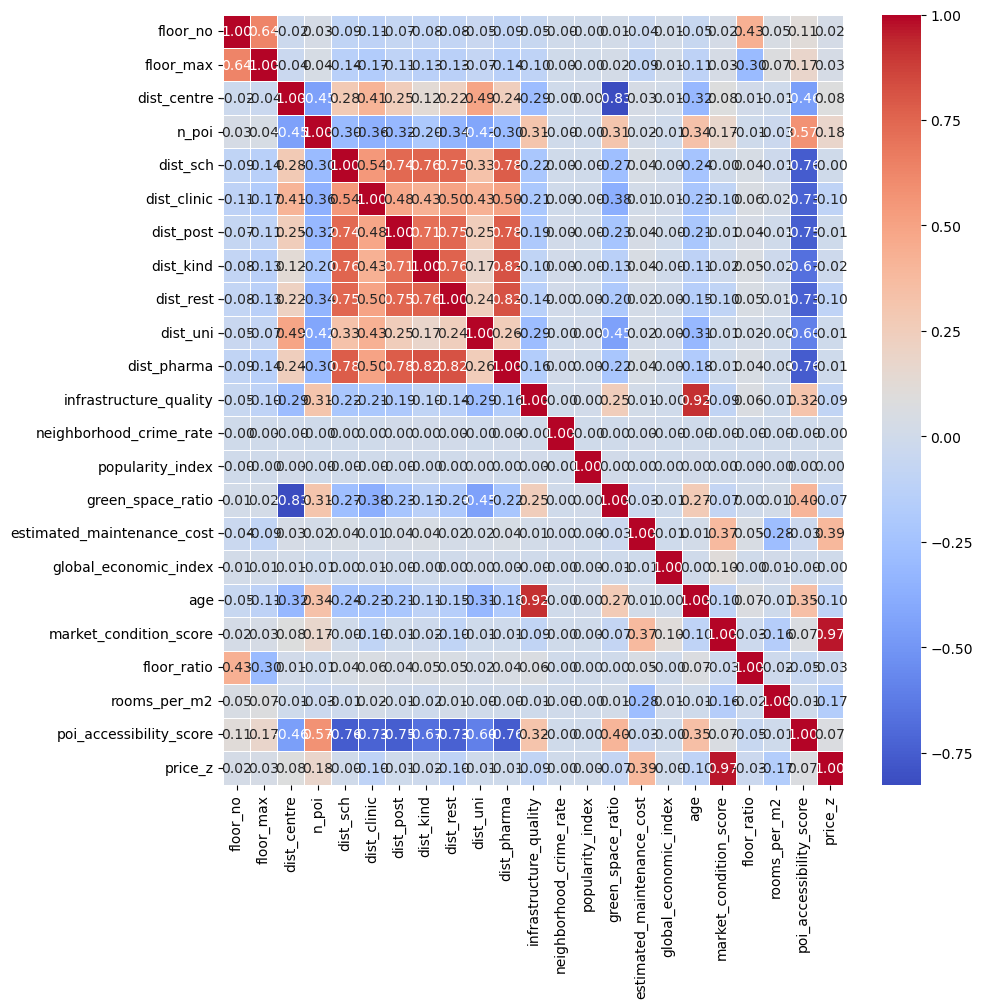

In [49]:

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.heatmap(appartment_correlations,
            annot = True,
            cmap = "coolwarm",
            fmt = ".2f",
            linewidths = 0.5)

<Axes: >

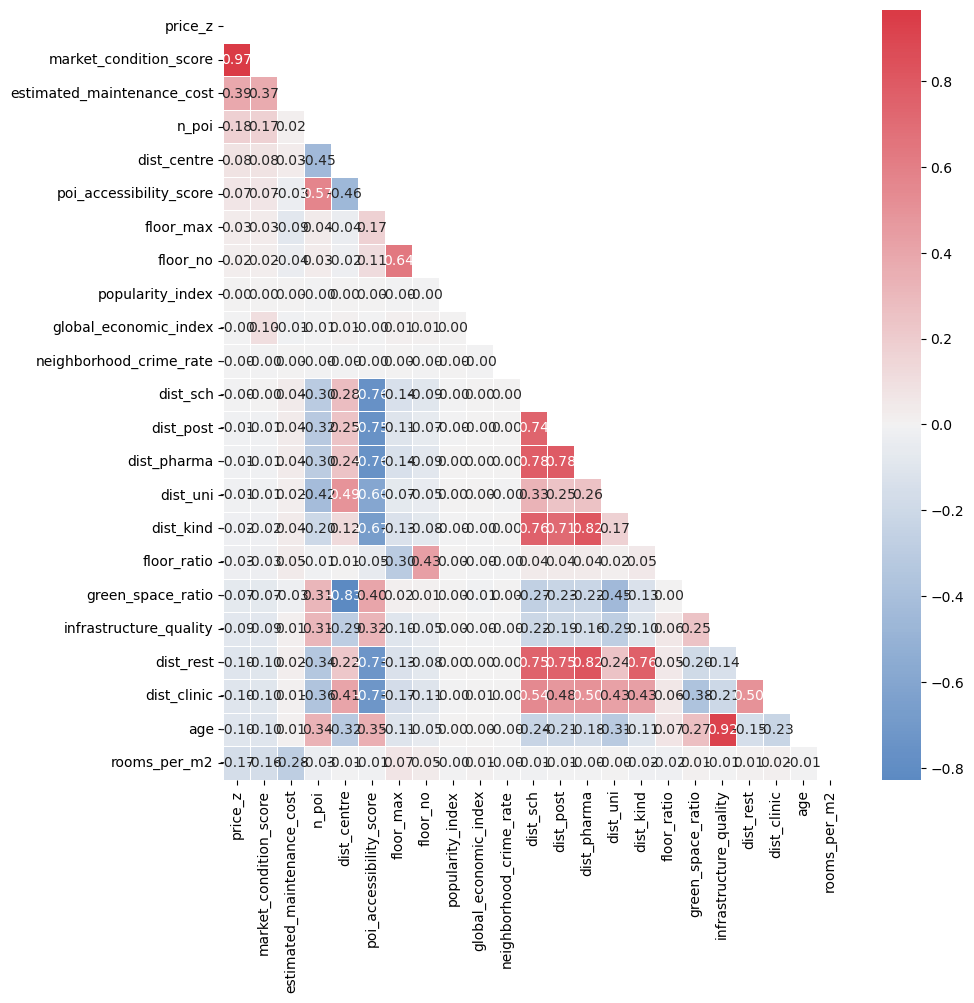

In [50]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(appartment_correlations, dtype = bool))

# Get the correlation of all features with 'price_z' and sort by the values
correlation_with_price = appartment_correlations['price_z'].sort_values(ascending = False)
ordered_columns = correlation_with_price.index  # This is the order of columns based on correlation

# Reorder the correlation matrix based on this order
appartment_correlations = appartment_correlations[ordered_columns].loc[ordered_columns]

my_cmap = sns.diverging_palette(250, 10, as_cmap = True)

# Create the heatmap
plt.figure(figsize=(10, 10))

sns.heatmap(appartment_correlations,
            annot = True,
            cmap = my_cmap,
            mask = mask,
            fmt = ".2f",
            linewidths = 0.5,
            center = 0)

<Axes: >

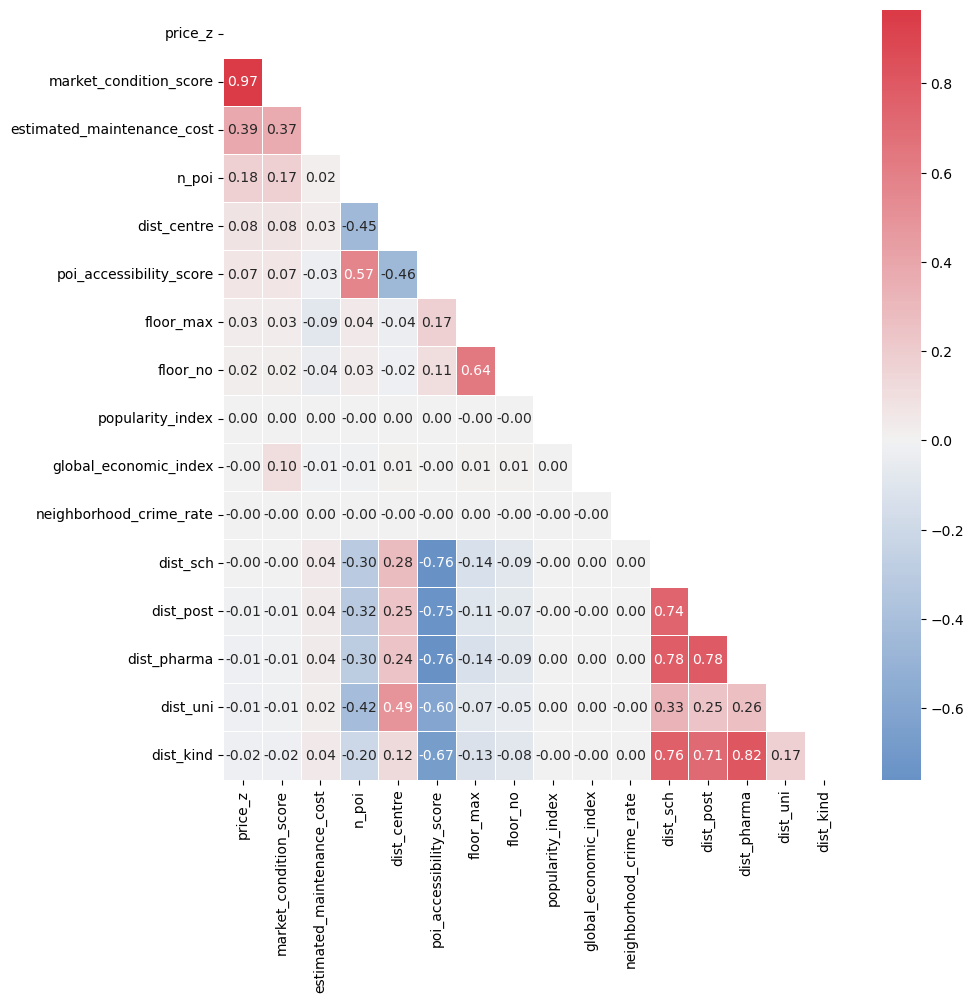

In [51]:

# Create the heatmap
plt.figure(figsize=(10, 10))

sns.heatmap(appartment_correlations.iloc[:16, :16],
            annot = True,
            cmap = my_cmap,
            mask = mask[:16, :16],
            fmt = ".2f",
            linewidths = 0.5,
            center = 0)

In [52]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Apply Log Transformation to 'price_z' (to handle skewness)
appartment_correlations['price_z_log'] = np.log(appartment_correlations['price_z'] + 1)  # Adding 1 to avoid log(0) or negative values

# Standardize the Log-Transformed Data using StandardScaler
scaler = StandardScaler()
appartment_correlations['price_z_log_scaled'] = scaler.fit_transform(appartment_correlations[['price_z_log']])

# Check the result
print(appartment_correlations[['price_z', 'price_z_log', 'price_z_log_scaled']].head())


                             price_z  price_z_log  price_z_log_scaled
price_z                     1.000000     0.693147            2.916514
market_condition_score      0.965314     0.675652            2.836364
estimated_maintenance_cost  0.389149     0.328691            1.246855
n_poi                       0.178377     0.164138            0.492998
dist_centre                 0.082263     0.079054            0.103209


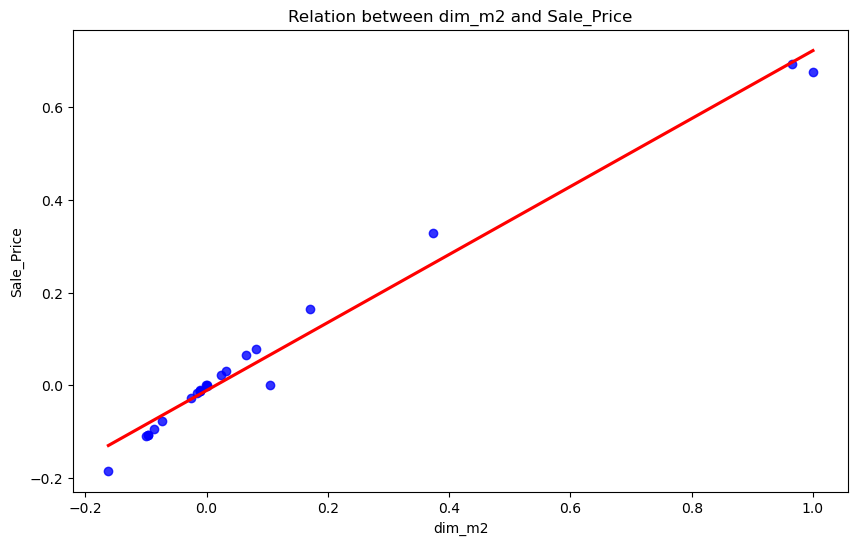

In [53]:

plt.figure(figsize=(10, 6))
sns.regplot(x = 'market_condition_score',
            y = 'price_z_log',
            data = appartment_correlations,
            scatter_kws = {'color': 'blue'},  # Color for the scatter points
            line_kws = {'color': 'red'},     # Color for the regression line
            ci = None)                       # No confidence interval for the line
plt.title('Relation between dim_m2 and Sale_Price')
plt.xlabel('dim_m2')
plt.ylabel('Sale_Price')
plt.show()

In [54]:

appartment_selected_numeric_vars = correlation_with_price.index[1:16].tolist()
print(appartment_selected_numeric_vars)

['market_condition_score', 'estimated_maintenance_cost', 'n_poi', 'dist_centre', 'poi_accessibility_score', 'floor_max', 'floor_no', 'popularity_index', 'global_economic_index', 'neighborhood_crime_rate', 'dist_sch', 'dist_post', 'dist_pharma', 'dist_uni', 'dist_kind']


In [55]:

appartment_selected_numeric_vars.remove('dist_pharma')
appartment_selected_numeric_vars.remove('dist_sch')
appartment_selected_numeric_vars.remove('dist_post')
print(appartment_selected_numeric_vars)


['market_condition_score', 'estimated_maintenance_cost', 'n_poi', 'dist_centre', 'poi_accessibility_score', 'floor_max', 'floor_no', 'popularity_index', 'global_economic_index', 'neighborhood_crime_rate', 'dist_uni', 'dist_kind']


In [56]:

appartment_categorical_variables = X_train_with_price.select_dtypes("object").columns
print(appartment_categorical_variables)

Index(['unit_id', 'obj_type', 'own_type', 'build_mat', 'loc_code'], dtype='object')


Qualitative Variables

In [57]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency

In [58]:

model = smf.ols('price_z ~ C(build_mat)',
                data = X_train_with_price).fit()

# Perform ANOVA on the fitted model
anova_table = anova_lm(model)

# Display the ANOVA table
print(anova_table)

                    df        sum_sq       mean_sq            F  PR(>F)
C(build_mat)       2.0  1.124759e+15  5.623797e+14  3235.769314     0.0
Residual      109514.0  1.903363e+16  1.738009e+11          NaN     NaN


In [59]:
# let's write a function that retrieves this value for selected
# categorical variables in their relation with a dependent variable
# and a dataset - provided as function arguments

def anova_for_categorical_vars(dataset, dep_var, cat_vars):
    # Initialize a list to store the results
    results = []

    # Loop through each categorical variable
    for var in cat_vars:
        # Fit the ANOVA model (Ordinary Least Squares regression)
        model = smf.ols(f'{dep_var} ~ C({var})', data = dataset).fit()

        # Perform ANOVA on the fitted model
        anova_table = anova_lm(model)

        # Extract the F-statistic and p-value from the ANOVA table
        f_statistic = anova_table['F'].iloc[0]  # First row in the F column
        p_value = anova_table['PR(>F)'].iloc[0]  # First row in the p-value column

        # Append the results to the list
        results.append([var, f_statistic, p_value])

    # Create a DataFrame with the results
    anova_results_df = pd.DataFrame(results,
                                    columns = ['Variable', 'F-statistic', 'p-value'])

    # Sort the DataFrame by F-statistic in decreasing order
    anova_results_df = anova_results_df.sort_values(by = 'F-statistic',
                                                    ascending = False)

    # Return the sorted DataFrame
    return anova_results_df

In [60]:
appartment_categorical_variables = [col for col in appartment_categorical_variables if col != 'unit_id']

In [61]:
for col in appartment_categorical_variables:
    print(f"{col}: {X_train_with_price[col].nunique()} unique values")

obj_type: 4 unique values
own_type: 3 unique values
build_mat: 3 unique values
loc_code: 15 unique values


In [62]:
# and apply it to our data
appartment_anova_results = anova_for_categorical_vars(X_train_with_price,
                                                  'price_z',
                                                  appartment_categorical_variables)
# Display the result
print(appartment_anova_results)

    Variable  F-statistic        p-value
0   obj_type  3437.607078   0.000000e+00
2  build_mat  3235.769314   0.000000e+00
3   loc_code  2804.671173   0.000000e+00
1   own_type   640.511963  2.776791e-277


<Axes: xlabel='obj_type', ylabel='price_z'>

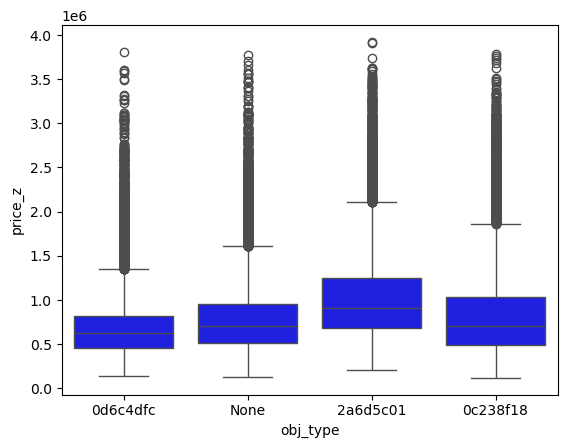

In [63]:
# Create a boxplot for 'Exter_Qual' vs 'Sale_Price'
sns.boxplot(x = 'obj_type',
            y = 'price_z',
            data = X_train_with_price,
            color  ='blue')  # Fill color for the boxplot

<Axes: xlabel='has_store', ylabel='price_z'>

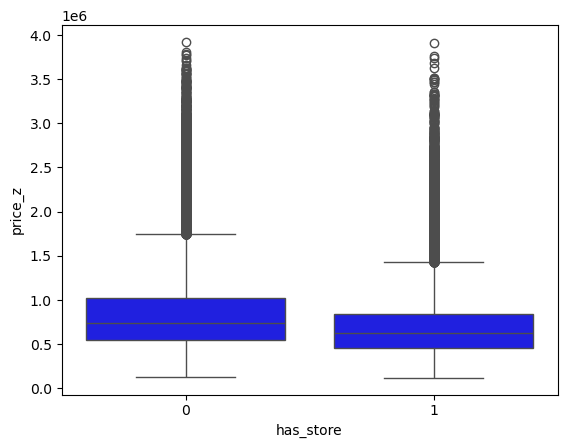

In [64]:
# Create a boxplot for 'Exter_Qual' vs 'Sale_Price'
sns.boxplot(x = 'has_store',
            y = 'price_z',
            data = X_train_with_price,
            color  ='blue')  # Fill color for the boxplot

<Axes: xlabel='src_month', ylabel='price_z'>

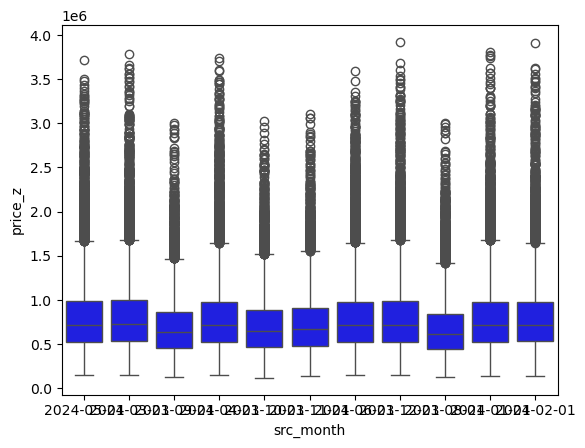

In [65]:
sns.boxplot(x = 'src_month',
            y = 'price_z',
            data = X_train_with_price,
            color  ='blue')  # Fill color for the boxplot

In [66]:
X_train_with_price["has_park"].value_counts()

has_park
0    79796
1    29721
Name: count, dtype: int64

In [67]:
def cramers_v(contingency_table):
    """Calculate Cramér's V statistic from a contingency table."""
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

def calculate_cramers_v_matrix(dataset, cat_vars):
    """Calculate the Cramér's V for each pair of categorical variables."""
    cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_vars), len(cat_vars))),
                                    columns = cat_vars,
                                    index = cat_vars)

    for i in range(len(cat_vars)):
        for j in range(i, len(cat_vars)):  # to avoid recalculating for the same pair
            var_1 = cat_vars[i]
            var_2 = cat_vars[j]

            # Create a contingency table for the two variables
            contingency_table = pd.crosstab(dataset[var_1], dataset[var_2])

            # Calculate Cramér's V
            cramers_v_value = cramers_v(contingency_table)

            # Store the result in the matrix
            cramers_v_matrix.loc[var_1, var_2] = cramers_v_value
            cramers_v_matrix.loc[var_2, var_1] = cramers_v_value  # Symmetric matrix

    return cramers_v_matrix

In [68]:
appartment_cramers_v_matrix = calculate_cramers_v_matrix(X_train_with_price, appartment_categorical_variables)

In [69]:
appartment_anova_results.head()

,Variable,F-statistic,p-value
0,obj_type,3437.607078,0.000000e+00
2,build_mat,3235.769314,0.000000e+00
3,loc_code,2804.671173,0.000000e+00
1,own_type,640.511963,2.776791e-277


In [70]:

variables_order = appartment_anova_results["Variable"].tolist()
appartment_cramers_v_matrix = appartment_cramers_v_matrix[variables_order].loc[variables_order]

<Axes: >

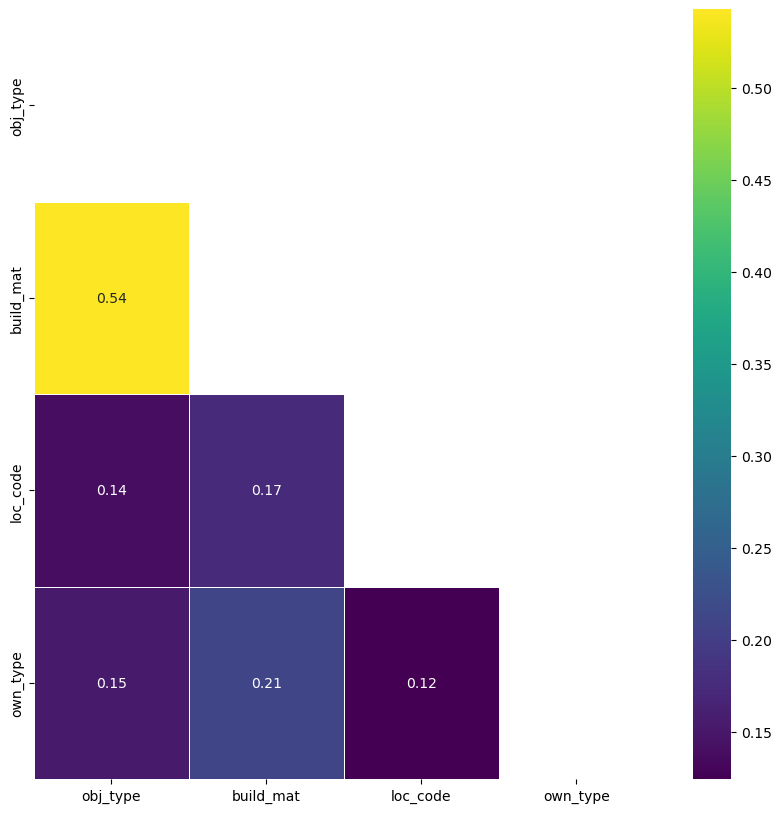

In [71]:
mask = np.triu(np.ones_like(appartment_cramers_v_matrix, dtype = bool))
plt.figure(figsize=(10, 10))
sns.heatmap(appartment_cramers_v_matrix,
            annot = True,
            cmap = "viridis",
            fmt = ".2f",
            mask = mask,
            linewidths = 0.5)

built mat and object type is correlated compare to others

In [72]:
appartment_selected_categorical_vars = appartment_anova_results[0:15]['Variable'].tolist()
print(appartment_selected_categorical_vars)

['obj_type', 'build_mat', 'loc_code', 'own_type']


In [73]:
appartment_selected_categorical_vars.remove('obj_type')
appartment_selected_categorical_vars.remove('build_mat')
print(appartment_selected_categorical_vars)

['loc_code', 'own_type']


In [74]:
appartment_selected_vars = appartment_selected_numeric_vars + appartment_selected_categorical_vars
print(appartment_selected_vars)

['market_condition_score', 'estimated_maintenance_cost', 'n_poi', 'dist_centre', 'poi_accessibility_score', 'floor_max', 'floor_no', 'popularity_index', 'global_economic_index', 'neighborhood_crime_rate', 'dist_uni', 'dist_kind', 'loc_code', 'own_type']


In [75]:
# and save into a pickle file for further examples
with open("appartment_selected_vars.pkl", "wb") as f:
    pickle.dump(appartment_selected_vars, f)

> Challenges and Solutions
> 
> High-Dimensional Data:
> 
> 
> 
> Used correlation analysis and ANOVA for feature selection
> 
> 
> 
> Implemented dimensionality reduction through Lasso
> 
> 
> 
> Missing Data:
> 
> 
> 
> Developed robust imputation strategy (median for numerical, "None" category for categorical)
> 
> 
> 
> Removed columns with >75% missing values
> 
> 
> 
> Non-Normal Distributions:
> 
> 
> 
> Applied appropriate transformations (log, Yeo-Johnson)
> 
> 
> 
> Used scaling to normalize feature distributions
> 
> 
> 
> Multicollinearity:
> 
> 
> 
> Addressed through VIF analysis and Lasso's inherent feature selection
> 
> 
> 
> Removed highly correlated features (e.g., dist_pharma, dist_sch)

3. MODELING

| Model          | R²     | MAE         | RMSE        |
|----------------|--------|-------------|-------------|
| XGBoost        | 0.9446 | 74,702.55   | 100,901.95  |
| Random Forest  | 0.9435 | 76,090.71   | 101,842.72  |
| Elastic Net    | 0.1485 | 138,566.17  | 160,000.00  |  
| Lasso          | 0.9320 | 110,000.00  | 111,314.09  |  
| Ridge          | 0.9287 | 84,393.19   | 104,015.14  |
| Linear Reg.    | 0.8308 | 139,948.11* | 476,072.64* |  <!-- Converted from scaled -->


In [76]:
import pickle

# Save transformed data
with open('X_trainand variance_transformed.pkl', 'rb') as f:
    X_train_transformed=pickle.load(f)
    X_val_transformed=pickle.load(f)
    
X_train_transformed.head()

,unit_id,obj_type,floor_no,floor_max,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,dist_kind,...,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index,age,is_central,market_condition_score,floor_ratio,rooms_per_m2,poi_accessibility_score
150487,b2fa27487ef1c071,0d6c4dfc,1.098612,2.397895,2.051685,0.522115,0.252314,0.282167,0.212689,0.144100,...,1.379005,-1.285221,2.952303,0.070877,0.575224,0,17.959516,-1.628174,0.049271,0.220000
89533,48f31f727fb7a364,None,1.386294,1.386294,1.675226,-0.537778,0.182322,0.832039,0.161268,0.311154,...,-1.065861,0.768101,2.302585,0.900404,1.104125,0,17.976415,1.176079,0.029566,-0.436572
147165,415e89c0a9391ca4,None,1.386294,1.791759,1.644612,0.334907,0.057325,0.181488,0.477476,0.235072,...,0.656703,0.768101,3.400197,0.094919,-1.020693,0,18.002098,-0.226047,0.044465,0.589094
7279,3ae0f6ff2918bb7d,0d6c4dfc,1.098612,2.197225,1.550537,0.924816,0.232698,0.024693,0.064851,0.036332,...,-0.630488,0.768101,3.396520,-1.360129,-0.873667,0,18.774347,-1.452908,0.045352,1.981643
95053,9bcd562535b43dcd,None,1.098612,1.609438,0.615726,-0.089140,0.185649,0.473124,0.400788,0.331460,...,-0.269835,0.768101,3.072230,0.054344,-1.542882,1,18.523483,-0.576579,0.033668,-0.105234


In [77]:
import pickle

# Define columns to exclude
exclude_cols = ['loc_code', 'own_type', 'src_month']

# Filter and append 'months_since'
filtered_vars = [col for col in appartment_selected_vars if col not in exclude_cols]
if 'months_since' not in filtered_vars:
    filtered_vars.append('months_since')
# Now use these columns to filter your DataFrame
train_df_filtered = train_df_encoded[filtered_vars]
# Check result
print(train_df_filtered.columns)

Index(['market_condition_score', 'estimated_maintenance_cost', 'n_poi',
       'dist_centre', 'poi_accessibility_score', 'floor_max', 'floor_no',
       'popularity_index', 'global_economic_index', 'neighborhood_crime_rate',
       'dist_uni', 'dist_kind', 'months_since'],
      dtype='object')


In [78]:
import pickle

# Define columns to exclude
exclude_cols = ['loc_code', 'own_type', 'src_month']

# Filter and append 'months_since'
filtered_vars = [col for col in appartment_selected_vars if col not in exclude_cols]
if 'months_since' not in filtered_vars:
    filtered_vars.append('months_since')

# Now use these columns to filter your DataFrame
val_df_filtered = val_df_encoded[filtered_vars]

# Check result
print(val_df_filtered.columns)


Index(['market_condition_score', 'estimated_maintenance_cost', 'n_poi',
       'dist_centre', 'poi_accessibility_score', 'floor_max', 'floor_no',
       'popularity_index', 'global_economic_index', 'neighborhood_crime_rate',
       'dist_uni', 'dist_kind', 'months_since'],
      dtype='object')


Lasso

Among the models tested, Lasso regression was chosen due to its balance of good predictive performance (R² = 0.93) and model simplicity. Lasso’s built-in feature selection helps reduce overfitting by eliminating irrelevant variables, making the model more interpretable and stable. Although XGBoost and Random Forest slightly outperform Lasso in accuracy, their complexity and lower interpretability led to preferring Lasso for this task.

In [79]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the pipeline with scaler and Lasso model
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('lasso', Lasso(max_iter=10000, random_state=42))  # Lasso regression model
])

# Use 5-fold cross-validation
cv5 = KFold(n_splits=5, shuffle=True, random_state=123)

# Define a finer hyperparameter grid for alpha
alphas = np.logspace(-4, 1, 100)  # Smaller range and more values
param_grid = {'lasso__alpha': alphas}

# Setup GridSearchCV using RMSE as scoring
lasso_search = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Optimize for RMSE
    cv=cv5,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model with log-transformed target variable
lasso_search.fit(train_df_filtered, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso',
                                        Lasso(max_iter=10000,
                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.12332403e-04, 1.26185688e-04, 1.41747416e-04,
       1.59228279e-04, 1.78864953e-04, 2.00923300e-04, 2.25701972e-04,
       2.53536449e-04, 2.8...
       6.89261210e-01, 7.74263683e-01, 8.69749003e-01, 9.77009957e-01,
       1.09749877e+00, 1.23284674e+00, 1.38488637e+00, 1.55567614e+00,
       1.74752840e+00, 1.96304065e+00, 2.20513074e+00, 2.47707636e+00,
       2.78255940e+00, 3.12571585e+00, 3.51119173e+00, 3.94420606e+00,
       4.43062146e+00, 4.97702356e+00, 5.59081018e+00, 6.28029144e+00,
       7.05480231e+00, 7.92482898e+00, 8.90215085e+00, 1.00000000e+01])},
             scoring='neg_root_mean_squared_error')

In [80]:

# Get the best alpha and score from GridSearchCV
print("Best alpha:", lasso_search.best_params_)
print("Best (negative) RMSE:", lasso_search.best_score_)

# Make predictions on the validation set (log scale)
pred = lasso_search.predict(val_df_filtered)

# Inverse the log transformation to original scale
#pred = np.expm1(pred_log)

# Evaluate performance on the original scale
val_mae = mean_absolute_error(y_val, pred)
val_rmse = np.sqrt(mean_squared_error(y_val, pred))

print("Validation MAE on original scale:", val_mae)
print("Validation RMSE on original scale:", val_rmse)


Best alpha: {'lasso__alpha': 10.0}
Best (negative) RMSE: -102277.12477281484
Validation MAE on original scale: 76759.74130830809
Validation RMSE on original scale: 101871.32724479446


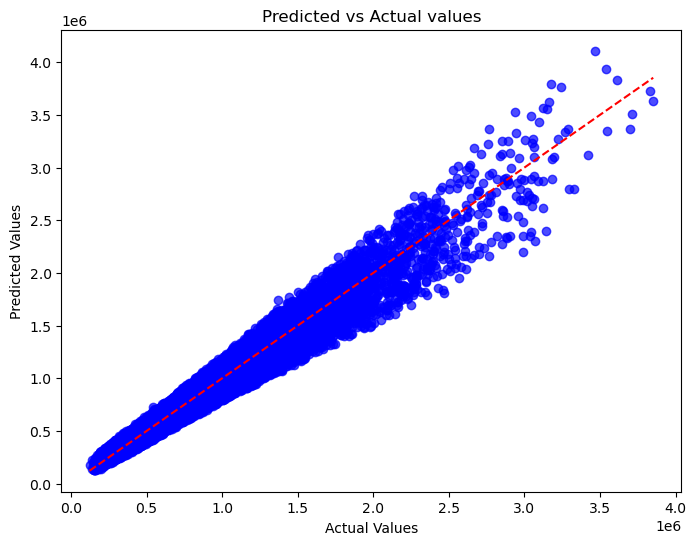

In [81]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, pred, alpha=0.7, color='blue')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual values')
plt.show()


In [107]:
# Test verisinde kullanılacak aynı kolonlar
selected_columns = [
    'market_condition_score', 'estimated_maintenance_cost', 'n_poi',
    'dist_centre', 'poi_accessibility_score', 'floor_max', 'floor_no',
    'popularity_index', 'global_economic_index', 'neighborhood_crime_rate',
    'dist_uni', 'dist_kind', 'months_since'
]

# Test verisini hazırla
X_test_selected = test_df_encoded[selected_columns]

# Dikkat: Satır uzunluğu uyuşmazlığı olabilir, önlemini al
min_len = min(len(X_test_selected), len(y_test))
X_test_selected = X_test_selected.iloc[:min_len].reset_index(drop=True)
y_test_aligned = y_test.iloc[:min_len].reset_index(drop=True)

# Test tahminleri
y_test_pred = lasso_search.predict(X_test_selected)

# Eğer y_train log transform edilmişse, inverse uygulayın
# y_test = np.expm1(y_test_aligned)  # sadece y_train logluysa gerek var
# y_test_pred = np.expm1(y_test_pred)

# Değerlendirme
test_mae = mean_absolute_error(y_test_aligned, y_test_pred)
test_rmse = mean_squared_error(y_test_aligned, y_test_pred, squared=False)

print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)


Test MAE: 782714.4300578756
Test RMSE: 891589.6029077691


c:\Users\ozdil\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Test target summary statistics:
count    2.346800e+04
mean     7.827279e+05
std      4.269636e+05
min      1.227449e+05
25%      5.017697e+05
50%      6.888581e+05
75%      9.417316e+05
max      3.851902e+06
Name: price_z, dtype: float64


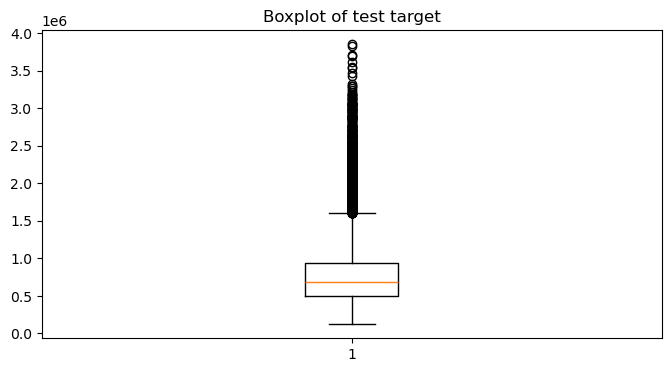

In [111]:
print("Test target summary statistics:")
print(y_test_aligned.describe())

plt.figure(figsize=(8, 4))
plt.boxplot(y_test_aligned)
plt.title("Boxplot of test target")
plt.show()


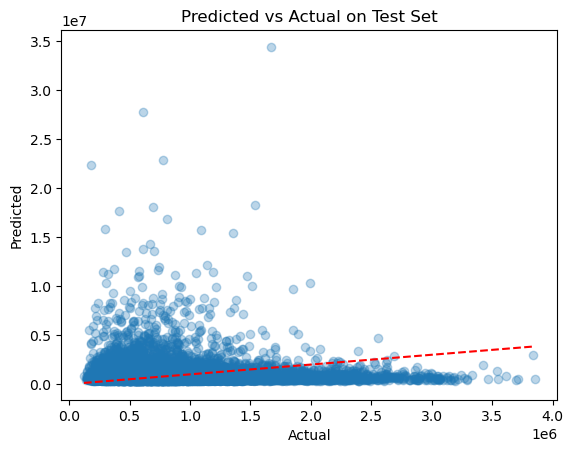

In [113]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual on Test Set')
plt.show()


In [82]:
import pickle

# Save the trained model
with open('lasso_rmse_model.pkl', 'wb') as f:
    pickle.dump(lasso_search, f)


4. PREDICTION

In [83]:
import pickle

with open("cleaned_test.pkl", "rb") as f:
    test_df_filtered = pickle.load(f)


In [84]:
test_df_filtered.columns

Index(['market_condition_score', 'estimated_maintenance_cost', 'n_poi',
       'dist_centre', 'poi_accessibility_score', 'floor_max', 'floor_no',
       'popularity_index', 'global_economic_index', 'neighborhood_crime_rate',
       'dist_uni', 'dist_kind', 'unit_id', 'months_since'],
      dtype='object')

In [85]:

import pandas as pd
import numpy as np

# Predict on test data 
y_pred_test = lasso_search.predict(test_df_filtered.drop(columns=['unit_id']))

# Inverse transform predictions to original scale
print(f"Predictions length: {len(y_pred_test)}")



Predictions length: 39114


In [86]:
import pandas as pd
import numpy as np

ids = test_df_filtered['unit_id']
X_test = test_df_filtered.drop(columns=['unit_id'])
y_pred_test = lasso_search.predict(X_test)

submission = pd.DataFrame({
    'unit_id': ids,
    'predicted_price': y_pred_test
})

submission.to_csv('predictions.csv', index=False)


In [87]:
import pandas as pd

# Load the predictions CSV
submission = pd.read_csv('predictions.csv')

# Display the first 10 rows
print(submission.head(10))

# Show summary info (optional)
print(submission.info())


            unit_id  predicted_price
0  553836e34a0d5d6b     5.765370e+05
1  e04d0521349583d9     6.198876e+05
2  83179d073b8319db     5.664149e+05
3  9af01b0ba6016d69     2.506956e+05
4  086cba055ca54004     2.887363e+05
5  3550a1de98642db2     4.027916e+05
6  7f282b569f65ac6f     1.123681e+06
7  87fef36d5cf1fe31     4.510076e+05
8  8496dfb68855d612     9.482165e+05
9  46c0c4306059f6ba     6.163788e+05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39114 entries, 0 to 39113
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unit_id          39114 non-null  object 
 1   predicted_price  39114 non-null  float64
dtypes: float64(1), object(1)
memory usage: 611.3+ KB
None


In [88]:
train_df_filtered.columns

Index(['market_condition_score', 'estimated_maintenance_cost', 'n_poi',
       'dist_centre', 'poi_accessibility_score', 'floor_max', 'floor_no',
       'popularity_index', 'global_economic_index', 'neighborhood_crime_rate',
       'dist_uni', 'dist_kind', 'months_since'],
      dtype='object')

In [89]:
test_df_encoded.columns

Index(['floor_no', 'floor_max', 'dist_centre', 'n_poi', 'dist_sch',
       'dist_clinic', 'dist_post', 'dist_kind', 'dist_rest', 'dist_uni',
       'dist_pharma', 'has_park', 'has_balcony', 'has_lift', 'has_sec',
       'has_store', 'src_month', 'infrastructure_quality',
       'neighborhood_crime_rate', 'popularity_index', 'green_space_ratio',
       'estimated_maintenance_cost', 'global_economic_index', 'age',
       'is_central', 'market_condition_score', 'floor_ratio', 'rooms_per_m2',
       'poi_accessibility_score', 'obj_type_0d6c4dfc', 'obj_type_2a6d5c01',
       'obj_type_None', 'build_mat_7f8c00f9', 'build_mat_None',
       'own_type_4e625087', 'own_type_bfb8fe10', 'months_since'],
      dtype='object')

In [94]:
# Eğer X_test_selected 1 satır fazlaysa:
if X_test_selected.shape[0] > y_test.shape[0]:
    X_test_selected = X_test_selected.iloc[:y_test.shape[0]]


In [95]:
print(f"X_test_selected shape: {X_test_selected.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Index match: {(X_test_selected.index == y_test.index).all()}")


X_test_selected shape: (23468, 13)
y_test shape: (23468,)
Index match: False


In [97]:
# İndeksleri sıfırla
X_test_selected = X_test_selected.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [102]:
min_len = min(len(X_test_selected), len(y_test))

X_test_selected = X_test_selected.iloc[:min_len].reset_index(drop=True)
y_test = y_test.iloc[:min_len].reset_index(drop=True)


In [104]:
y_pred = lasso_search.predict(X_test_selected)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")


Test MAE: 782714.4301
Test RMSE: 891589.6029


c:\Users\ozdil\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [105]:
print(f"Best alpha: {lasso_search.best_params_['lasso__alpha']}")


Best alpha: 0.0001788649529057435


In [108]:
errors = np.abs(y_test - y_test_pred)
outlier_threshold = 1_000_000  # 1M TL üstü hata
print(f"{(errors > outlier_threshold).mean()*100:.2f}% of test predictions have >1M error")


21.25% of test predictions have >1M error


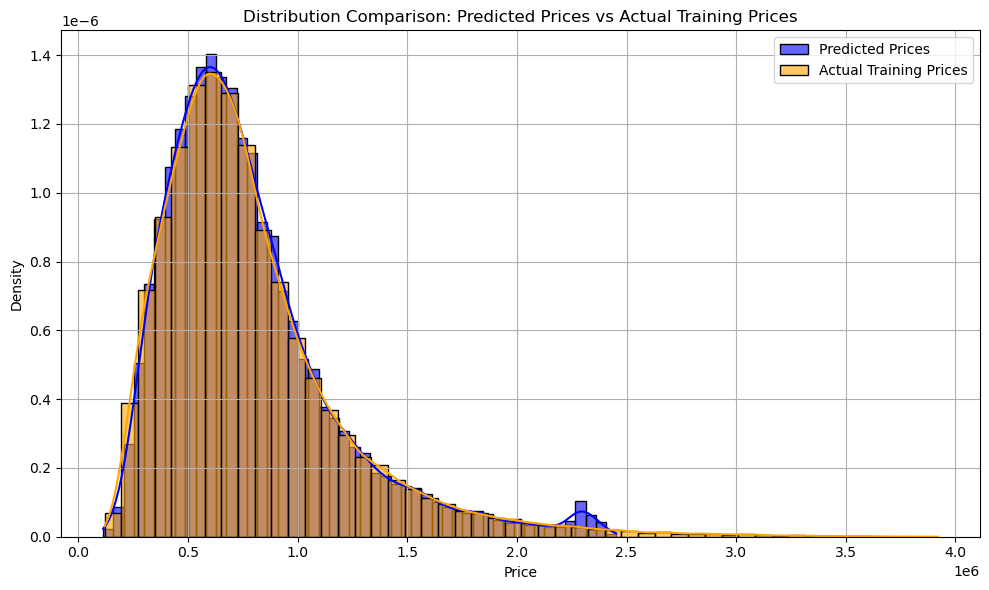

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot predicted test prices
sns.histplot(y_pred_test, bins=50, kde=True, color='blue', label='Predicted Prices', stat='density', alpha=0.6)

# Plot actual training prices
sns.histplot(y_train, bins=50, kde=True, color='orange', label='Actual Training Prices', stat='density', alpha=0.6)

plt.title("Distribution Comparison: Predicted Prices vs Actual Training Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Predicted RMSE value for test = 101871.32724479446